In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from utils.hmatr import Hmatr
from thresh import ThreshAnalytical
from utils.utils import generate_series, find_Q_hat

In [2]:
N = 700  # Длина ряда
w1 = 1 / 10  # Начальная частота
Q = 301
r = 2
method = "svd"

---

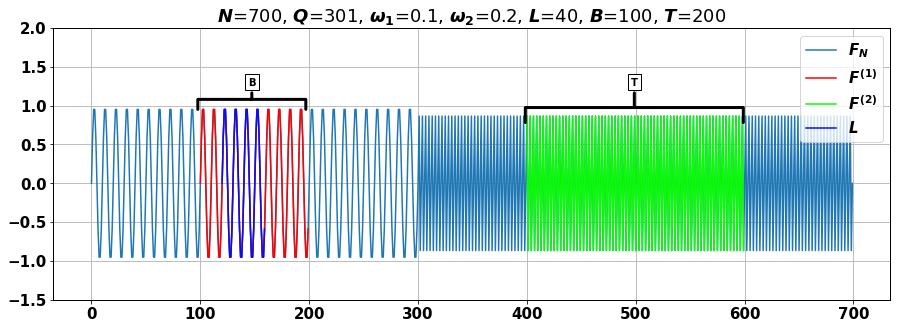

In [3]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=1)


w2 = 1/5

B = 100
T_ = 200
L = 40


original_series = generate_series(w1, 1/3, Q, N)

B_start = 100
X_base = np.arange(B)+B_start
base = original_series[B_start:B_start+B]

T_start = 400
X_test = np.arange(T_)+T_start
test = original_series[T_start:T_start+T_]

L_start = 120
X_l = np.arange(L)+L_start
l_ser = original_series[L_start:L_start+L]

plt.figure(figsize=(15, 5))
colors = plt.cm.hsv(np.linspace(0, 1, 10))

plt.annotate('B', xy=(0.237, 0.73), xytext=(0.237, 0.8), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5.4, lengthB=1', lw=3.0))

plt.annotate('T', xy=(0.694, 0.7), xytext=(0.694, 0.8), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=10.9, lengthB=1.5', lw=3.0))

plt.plot(original_series, label=r"$F_N$")
plt.plot(X_base, base, label=r"$F^{(1)}$", color=colors[0])
plt.plot(X_test, test, label=r"$F^{(2)}$", color=colors[3])
plt.plot(X_l, l_ser, label=r"$L$", color=colors[6])
plt.title(fr"$N$={N}, $Q$={Q}, $\omega_1$={w1}, $\omega_2$={w2}, $L$={L}, $B$={B}, $T$={T_}")
# plt.legend(loc='upper left')
plt.legend()
plt.ylim((-1.5, 2))
plt.grid()
plt.show()
# designations.png

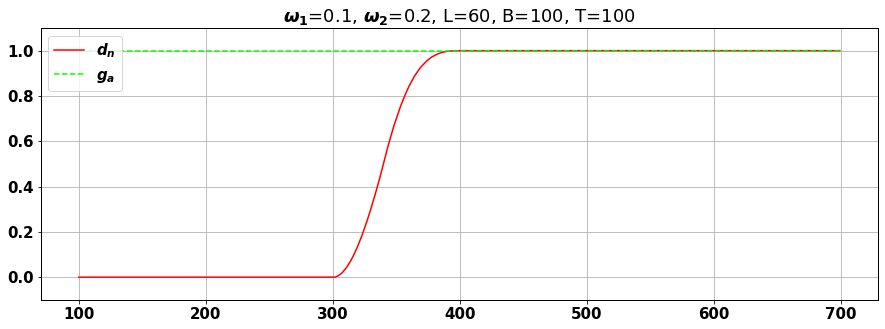

In [201]:
np.random.seed(12345)
w_min = w1 + 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, 1/3, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
g_analytical = ThreshAnalytical(w1, w2, L, T_, k, 0).value_after_heterogeneity
colors = plt.cm.hsv(np.linspace(0, 1, 7))
X = np.arange(T_, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$', color=colors[0])
plt.plot(X, [g_analytical]*len(row1), "--", label=r'$g_a$', color=colors[2], )


plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, L={L}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# example_approx.png

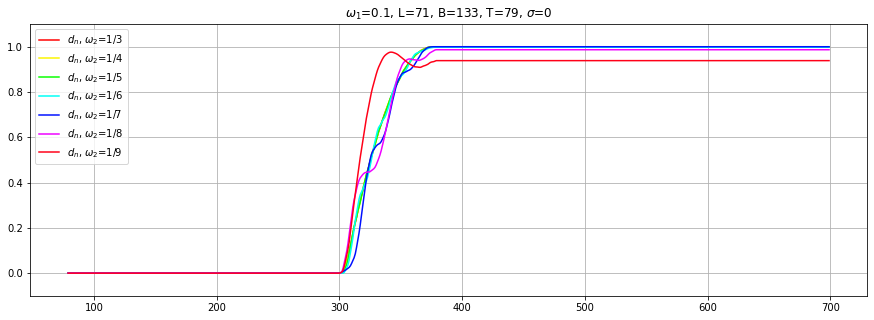

In [3]:
np.random.seed(12345)
w_min = w1 + 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/7

B = 133
T_ = 79
L = 71
noise = np.random.normal(scale=0.0, size=N)
original_series = generate_series(w1, 1/3, Q, N) + noise
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/4, Q, N) + noise
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/5, Q, N) + noise
row3 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/6, Q, N) + noise
row4 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/7, Q, N) + noise
row5 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/8, Q, N) + noise
row6 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/9, Q, N) + noise
row7 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
colors = plt.cm.hsv(np.linspace(0, 1, 7))
X = np.arange(T_, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$, $\omega_2$=1/3', color=colors[0])
plt.plot(X, row2, label=r'$d_n$, $\omega_2$=1/4', color=colors[1])
plt.plot(X, row3, label=r'$d_n$, $\omega_2$=1/5', color=colors[2])
plt.plot(X, row4, label=r'$d_n$, $\omega_2$=1/6', color=colors[3])
plt.plot(X, row5, label=r'$d_n$, $\omega_2$=1/7', color=colors[4])
plt.plot(X, row6, label=r'$d_n$, $\omega_2$=1/8', color=colors[5])
plt.plot(X, row7, label=r'$d_n$, $\omega_2$=1/9', color=colors[6])


plt.title(fr"$\omega_1$={w1}, L={L}, B={B}, T={T_}, $\sigma$=0")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# diff_moment_growth.png

In [1]:
np.random.seed(12345)
w_min = w1 + 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/7

B = 133
T_ = 79
L = 71
noise = np.random.normal(scale=0, size=N)
# noise = 0

original_series = generate_series(w1, 1/7, Q, N) + noise
row5 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, 1/9, Q, N) + noise
row7 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(T_, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row5, label=r'$d_n$, $\omega_2$=1/7')
plt.plot(X, row7, label=r'$d_n$, $\omega_2$=1/9')


plt.title(fr"$\omega_1$={w1}, L={L}, B={B}, T={T_}, $\sigma$=0")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# diff_moment_growth_most_unique.png

NameError: name 'np' is not defined

In [94]:
def modelling_series():
    np.random.seed(1234567)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(100)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.6, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [95]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w1 = 1/10  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 15  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/7

In [96]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series()

C:\Users\ivank\AppData\Local\Temp\ipykernel_21036\3521493085.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(100)):


  0%|          | 0/100 [00:00<?, ?it/s]

Modelling took 173.9241 s


In [97]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
fnr = []  # Детекции позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
k = 15
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    fn = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            fn += 1
            continue
        Q_hat += T_
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
        if Q_hat > Q+k:
            fn += 1
    fpr.append(round(fp/100, 4))
    tpr.append(round(tp/100, 4))
    fnr.append(round(fn/100, 4))

mean_thresh = []
mean_init_val = []
for row in modelled_rows:
    mean_init_val.append(np.quantile(row[:int(N/4) - T_], 0.75))
    g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, np.mean(mean_init_val))
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)


print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.103 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_21036\1341376542.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


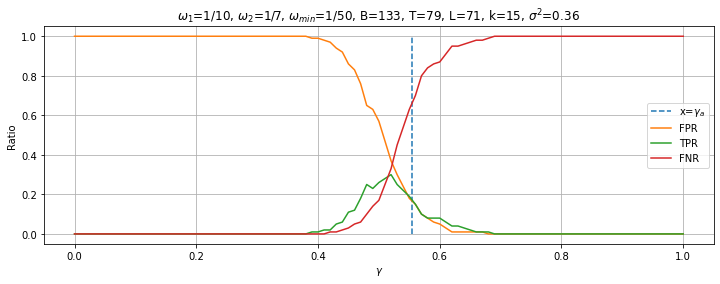

FPR corresponding to analytical thresh: 0.15


In [99]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
plt.plot(threshes, fnr, label='FNR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$n_{iter}$'
plt.title(fr"$\omega_1$=1/10, $\omega_2$=1/7, {w_min_str}=1/50, B={B}, T={T_}, L={L}, k={k}, $\sigma^2$={0.36}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation_small_k_noise.png

In [59]:
mean_thresh, threshes[53]

(0.6406813735976417, 0.53)

In [60]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

approx_correct = [0 for i in range(Q-T_)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

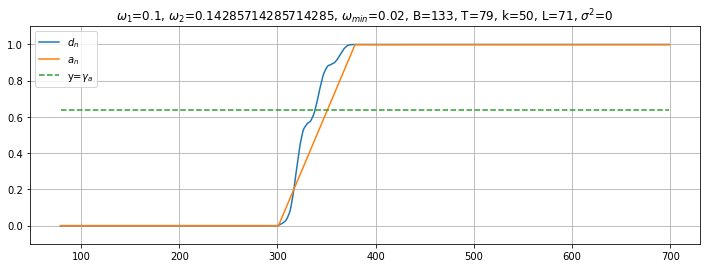

In [61]:
X = np.arange(T_, N)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(T_, N), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, k={k}, L={L}, $\sigma^2$={0}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter

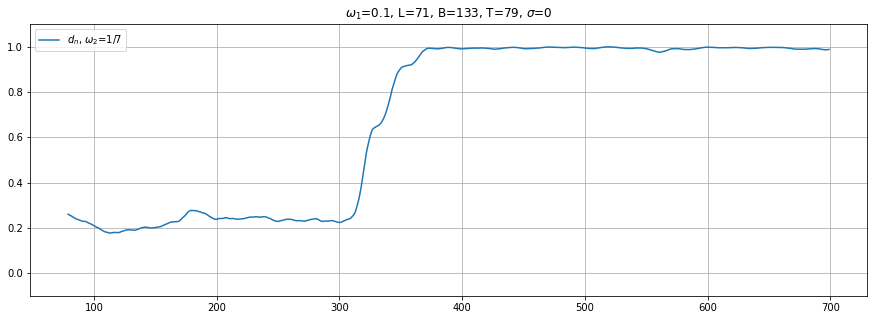

In [12]:
np.random.seed(12345)
w_min = w1 + 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/7

B = 133
T_ = 79
L = 71
noise = np.random.normal(scale=0.4, size=N)

original_series = generate_series(w1, 1/7, Q, N) + noise
row5 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# original_series = generate_series(w1, 1/9, Q, N) + noise
# row7 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(T_, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row5, label=r'$d_n$, $\omega_2$=1/7')
# plt.plot(X, row7, label=r'$d_n$, $\omega_2$=1/9')


plt.title(fr"$\omega_1$={w1}, L={L}, B={B}, T={T_}, $\sigma$=0")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()

## Индекс неоднородности: аппроксимация

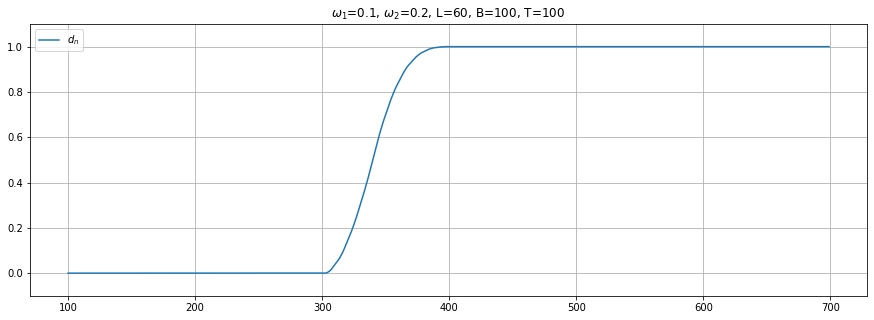

In [13]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.2

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$')


plt.title(fr"$\omega_1$={w1}, $\omega_2$=0.2, L={L}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# heterogeneity_index_row.png

## Оценка $ \gamma^* $

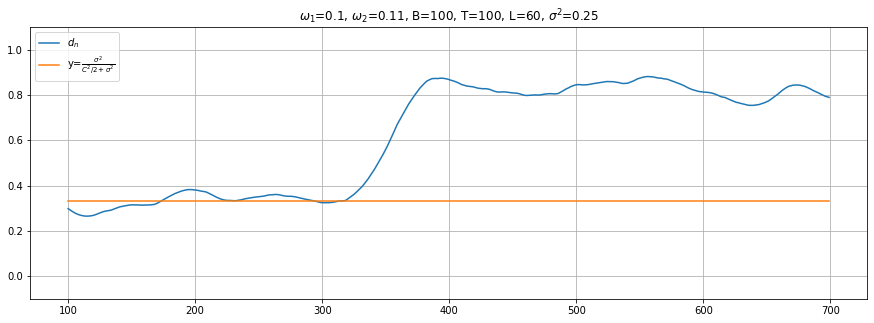

In [5]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.2

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, 0.11, Q, N) + np.random.normal(scale=0.5, size=N)
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_1 = 0.25 / (0.5 + 0.25)

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row2, label=r'$d_n$')
plt.plot(X, [sigma_est_1]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$')

plt.title(fr"$\omega_1$={w1}, $\omega_2$=0.11, B={B}, T={T_}, L={L}, $\sigma^2$=0.25")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# estimate_gamma_noise.png

## Нижняя граница

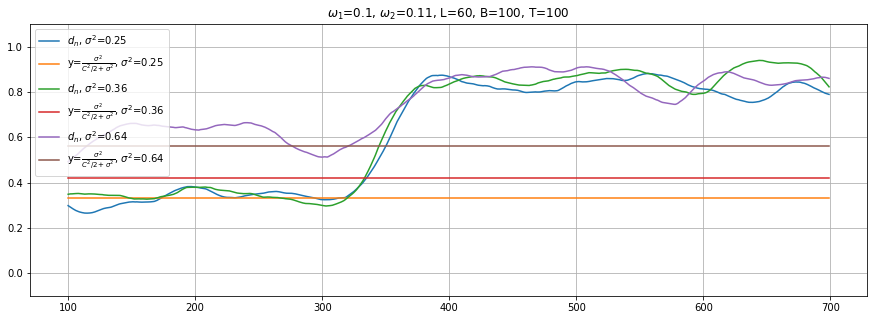

In [6]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.11

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.5, size=N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_1 = 0.25 / (0.5 + 0.25)

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.6, size=N)
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_2 = 0.36 / (0.5 + 0.36)

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.8, size=N)
row3 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_3 = 0.64 / (0.5 + 0.64)


X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$, $\sigma^2$=0.25')
plt.plot(X, [sigma_est_1]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$, $\sigma^2$=0.25')

plt.plot(X, row2, label=r'$d_n$, $\sigma^2$=0.36')
plt.plot(X, [sigma_est_2]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$, $\sigma^2$=0.36')

plt.plot(X, row3, label=r'$d_n$, $\sigma^2$=0.64')
plt.plot(X, [sigma_est_3]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$, $\sigma^2$=0.64')


plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, L={L}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.savefig("estimate_noise.png")
plt.show()
# row_diff_noise_var.png

In [7]:
noise_sd = 0.5

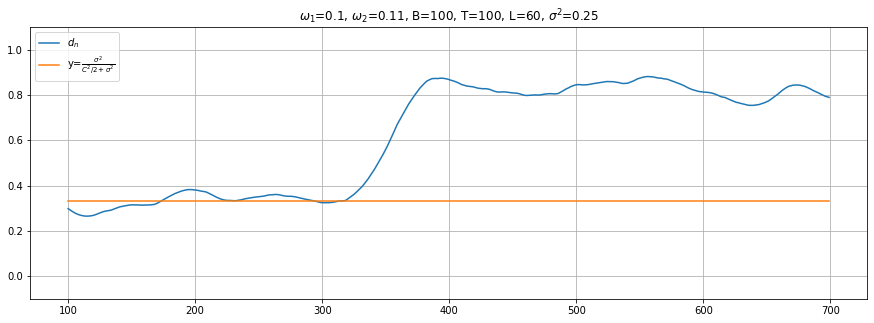

In [9]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.11

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_1 = 0.25 / (0.5 + 0.25)


X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$')
plt.plot(X, [sigma_est_1]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$')


plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, T={T_}, L={L}, $\sigma^2$=0.25")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
# plt.savefig("estimate_noise.png")
plt.show()
# estimate_noise.png

# Верхняя граница

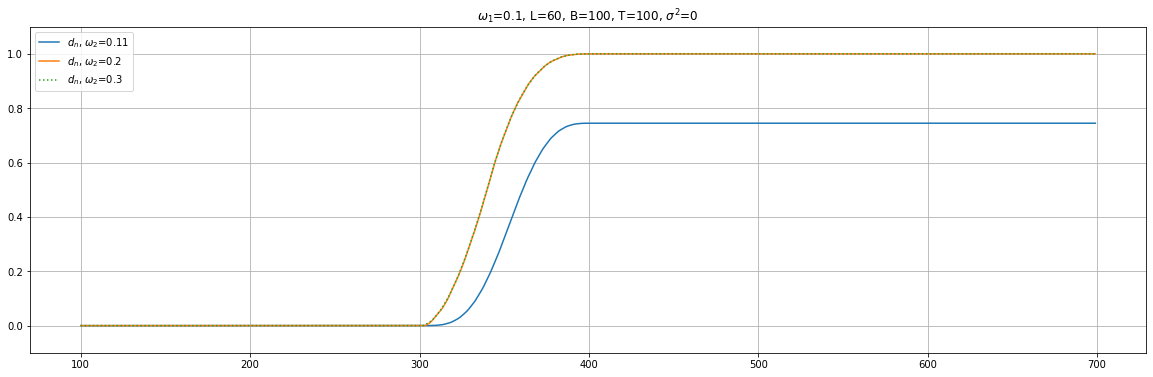

In [10]:
w2 = w1 + 1/100
B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

w2 = 2/10
original_series = generate_series(w1, w2, Q, N)
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

w2 = 3/10
original_series = generate_series(w1, w2, Q, N)
row3 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(B, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(20, 6))
plt.plot(X, row1, label=fr'$d_n$, $\omega_2$={w1 + 1/100}')
plt.plot(X, row2, label=fr'$d_n$, $\omega_2$={2/10}')
plt.plot(X, row3, ':', label=fr'$d_n$, $\omega_2$={3/10}')
plt.title(fr"$\omega_1$={w1}, L={L}, B={B}, T={T_}, $\sigma^2$=0")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# diff_omega_growth.png

## Аппроксимация переходного интервала.

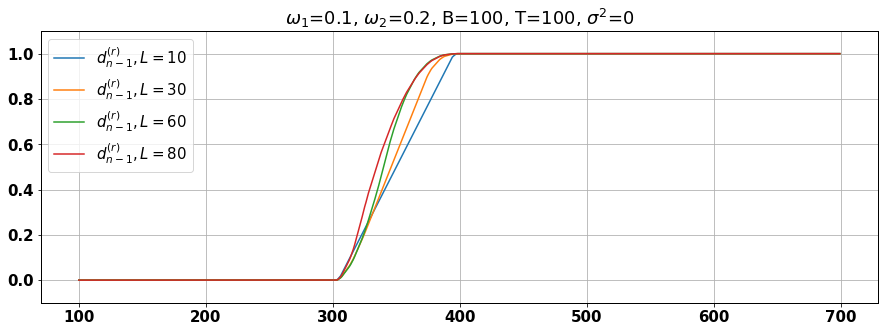

In [8]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=1)

w_min = w1 + 1/10  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = w_min

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=10, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=T_, L=30, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=B, T=T_, L=60, neig=r, svdMethod=method).getRow()
row4 = Hmatr(f=original_series, B=B, T=T_, L=80, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, w_min, Q, N)
X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_{n-1}^{(r)}, L=10$')
plt.plot(X, row2, label=r'$d_{n-1}^{(r)}, L=30$')
plt.plot(X, row3, label=r'$d_{n-1}^{(r)}, L=60$')
plt.plot(X, row4, label=r'$d_{n-1}^{(r)}, L=80$')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, T={T_}, $\sigma^2$=0")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_growth

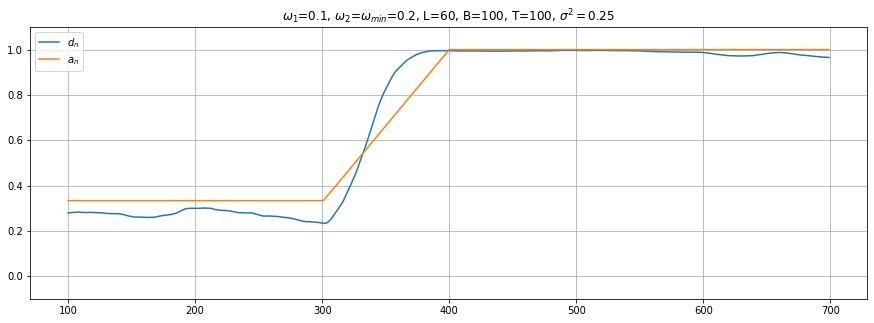

In [12]:
w_min = w1 + 1/10  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = w_min

B = 100
T_ = 100
L = 60
sigma_square = 0.25
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = noise_sd**2/(0.5 + noise_sd**2)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]



X = np.arange(B, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, L={L}, B={B}, T={T_}, $\sigma^2={sigma_square}$")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_approximation_1

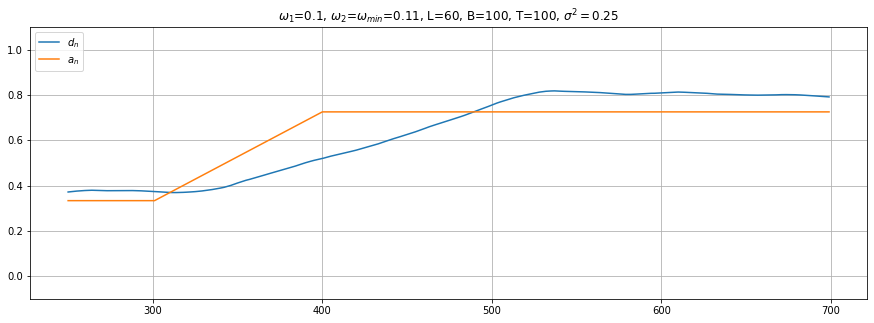

In [15]:
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = w_min

B = 100
T_ = 100
L = 60

sigma_square = 0.25
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row = Hmatr(f=original_series, B=B, T=250, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = noise_sd**2/(0.5 + noise_sd**2)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-250)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]



X = np.arange(250, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, L={L}, B={B}, T={T_}, $\sigma^2={sigma_square}$")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_approximation_2

## Пример работы системы

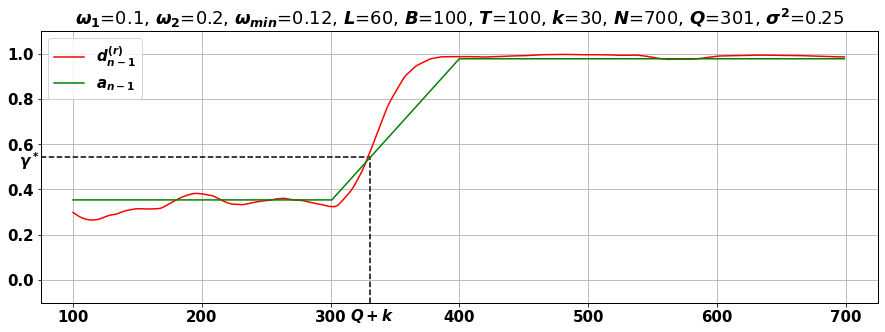

In [255]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=1)


noise_sd = 0.5
np.random.seed(12345)
w_min = w1 + 1/50  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = np.quantile(row[:Q-T_], 0.75)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]
Q_hat = find_Q_hat(row, g_analytical.thresh)

perpendicular = [331]* round(g_analytical.thresh * 100)


w_min_str = r'$\omega_{min}$'

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot([331]*round(g_analytical.thresh * 100), np.linspace(-0.1, g_analytical.thresh, round(g_analytical.thresh * 100)), '--', color='black')
plt.plot(np.linspace(50, 331, 200), [g_analytical.thresh] * 200, '--', color='black')
plt.plot(X, row, label=r'$d_{n-1}^{(r)}$', color='red')
plt.plot(X, approx, label=r'$a_{n-1}}$', color='green')
# plt.plot(np.arange(B, N), [row[Q_hat]] * len(row), '--', label=r'$y=\gamma^*$')
# plt.plot(Q_hat+B, row[Q_hat], marker='o')
plt.text(x=58, y=g_analytical.thresh - 0.04, s=r"$\gamma^*$")
plt.text(x=315, y=-0.18, s=r"$Q + k$")
# plt.plot(331, -0.1, marker="o", markersize=10, markerfacecolor="green")

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={np.round(w_min,4)}, $L$={L}, $B$={B}, $T$={T_}, $k$={k}, $N$={N}, $Q$={Q}, $\sigma^2$={noise_sd**2}")
plt.legend(loc='upper left')
plt.xlim((75, 725))
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# example_system_work.png

In [21]:
g_analytical.value_after_heterogeneity

0.9889484244986944

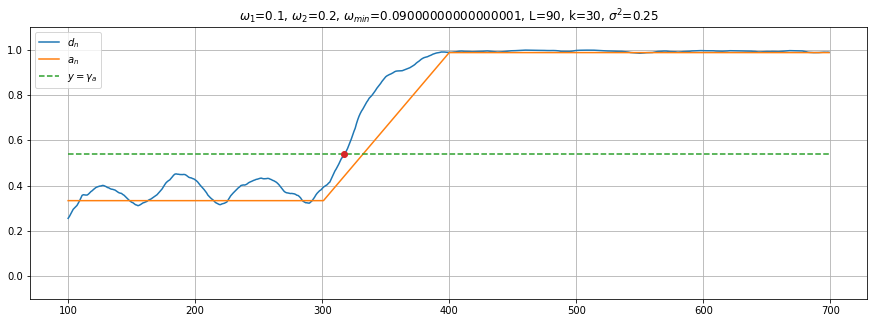

In [22]:
np.random.seed(12345)
w_min = w1 - 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 90

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = noise_sd**2/(0.5 + noise_sd**2)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]
Q_hat = find_Q_hat(row, g_analytical.thresh)
w_min_str = r'$\omega_{min}$'

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
plt.plot(np.arange(B, N), [row[Q_hat]] * len(row), '--', label=r'$y=\gamma_a$')
plt.plot(Q_hat+B, row[Q_hat], marker='o')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={w_min}, L={L}, k={k}, $\sigma^2$={sigma_square}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()

In [23]:
g_analytical.value_after_heterogeneity

0.9870048641629402

# Оценка системы

## $\sigma^2=0.25$

In [18]:
from tqdm import tqdm

In [127]:
iter_num = 200
noise_sd = 0.5

In [128]:
def modelling_series():
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [129]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

In [130]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series()

100%|██████████| 200/200 [03:51<00:00,  1.16s/it]

Modelling took 231.498 s


In [132]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
fnr = []  # Детекции позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    fn = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            fn += 1
            continue
        Q_hat += B
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
        if Q_hat > Q+k:
            fn += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))
    fnr.append(round(fn/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = noise_sd**2/(0.5 + noise_sd**2)
    g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)


print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.163 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_4748\182968280.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


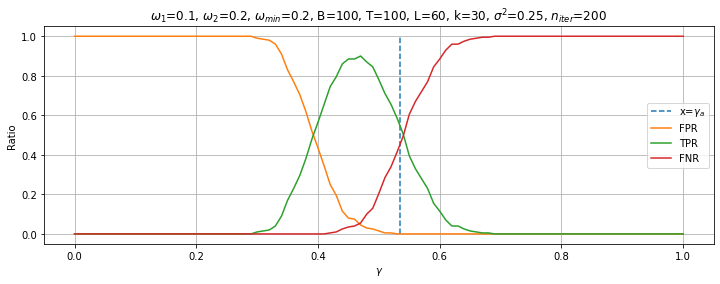

FPR corresponding to analytical thresh: 0.0


In [133]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
plt.plot(threshes, fnr, label='FNR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$n_{iter}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, L={L}, k={k}, $\sigma^2$={noise_sd**2}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation

In [135]:
mean_thresh, threshes[53]

(0.5353535353535354, 0.53)

In [136]:
fpr[53]

0.0

In [137]:
tpr[53]

0.585

In [138]:
fnr[53]

0.415

In [139]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

approx_correct = [initial_value for i in range(Q-T_)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

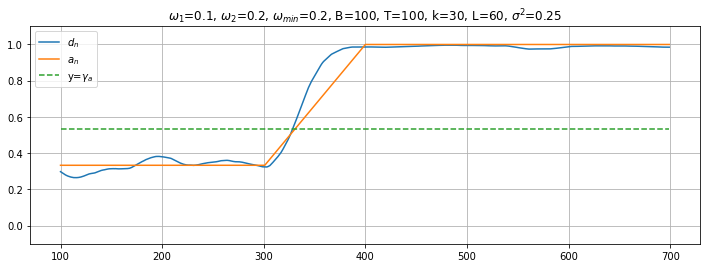

In [140]:
X = np.arange(B, N)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(B, N), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, k={k}, L={L}, $\sigma^2$={noise_sd**2}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter

In [141]:
print(f"Q_hat using analytical thresh: {Q_hat_correct}, found using {Q_hat_correct-Q+B} points, k = {k}")

Q_hat using analytical thresh: 229, found using 28 points, k = 30


## $\sigma^2=0.25^2$

In [142]:
from tqdm import tqdm

In [143]:
iter_num = 200
noise_sd = 0.25

In [144]:
def modelling_series():
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [145]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

In [146]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series()

100%|██████████| 200/200 [03:50<00:00,  1.15s/it]

Modelling took 230.2876 s


In [147]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
fnr = []  # Детекции позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    fn = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            fn += 1
            continue
        Q_hat += B
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
        if Q_hat > Q+k:
            fn += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))
    fnr.append(round(fn/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = noise_sd**2/(0.5 + noise_sd**2)
    g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)


print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.23 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_4748\182968280.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


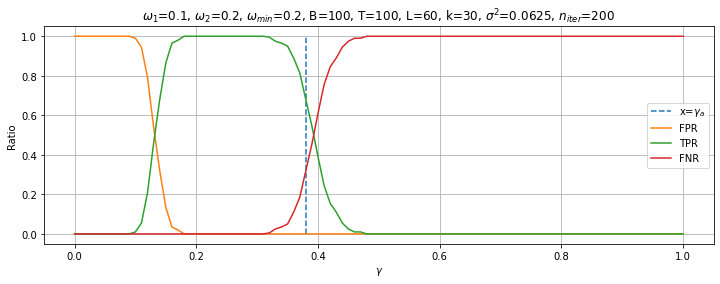

FPR corresponding to analytical thresh: 0.0


In [148]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
plt.plot(threshes, fnr, label='FNR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$n_{iter}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, L={L}, k={k}, $\sigma^2$={noise_sd**2}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation_small_sd

In [150]:
mean_thresh, threshes[38]

(0.38047138047138057, 0.38)

In [154]:
fpr[38]

0.0

In [155]:
tpr[38]

0.68

In [156]:
fnr[38]

0.32

In [157]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

approx_correct = [initial_value for i in range(Q-T_)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

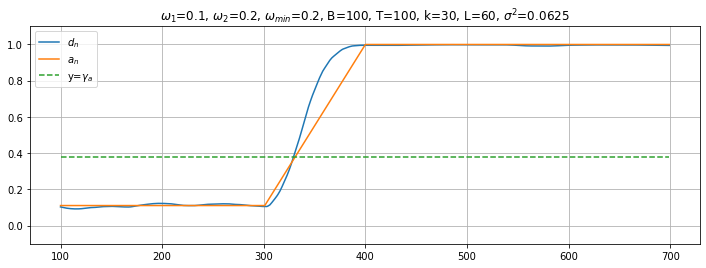

In [158]:
X = np.arange(B, N)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(B, N), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, k={k}, L={L}, $\sigma^2$={noise_sd**2}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_small_sd_one_iter

In [141]:
print(f"Q_hat using analytical thresh: {Q_hat_correct}, found using {Q_hat_correct-Q+B} points, k = {k}")

Q_hat using analytical thresh: 229, found using 28 points, k = 30


## Оценка влияния параметра T

### T = 70

In [36]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5
T = 70
iter_num = 200
noise_sd = 0.5

In [37]:
def modelling_series(t):
    if t is None:
        t = T_
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=t, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [38]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series(T)

C:\Users\ivank\AppData\Local\Temp\ipykernel_21668\143398379.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(iter_num)):


  0%|          | 0/200 [00:00<?, ?it/s]

Modelling took 241.0754 s


In [50]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
fnr = []  # Детекции позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    fn = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            fn += 1
            continue
        Q_hat += T
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
        if Q_hat > Q+k:
            fn += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))
    fnr.append(round(fn/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = np.quantile(row[:Q-T], 0.75)
    g_analytical = ThreshAnalytical(w1, w_min, L, T, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)


print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.193 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_21668\947706245.py:9: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


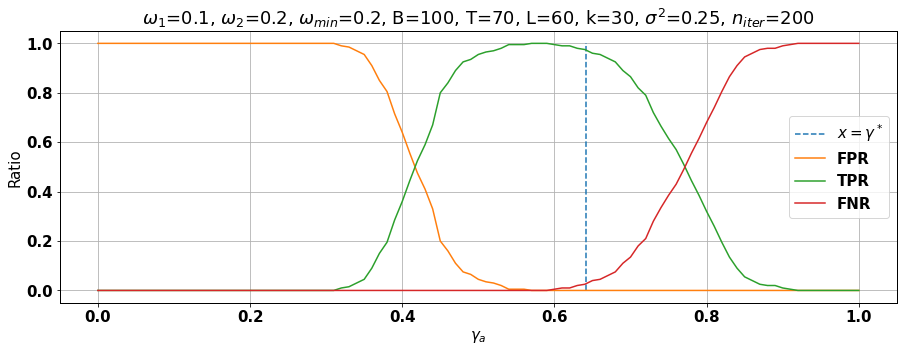

In [51]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=1)

plt.figure(figsize=(15, 5))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'$x=\gamma^*$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
plt.plot(threshes, fnr, label='FNR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$n_{iter}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, L={L}, k={k}, $\sigma^2$={noise_sd**2}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma_a$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')

plt.savefig("../presentation/imgs/system_estimation_t=70.png")
# system_estimation_t=70


In [52]:
row = modelled_rows[0]
initial_value = np.quantile(row[:Q-T], 0.75)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)
approx_correct = [initial_value for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

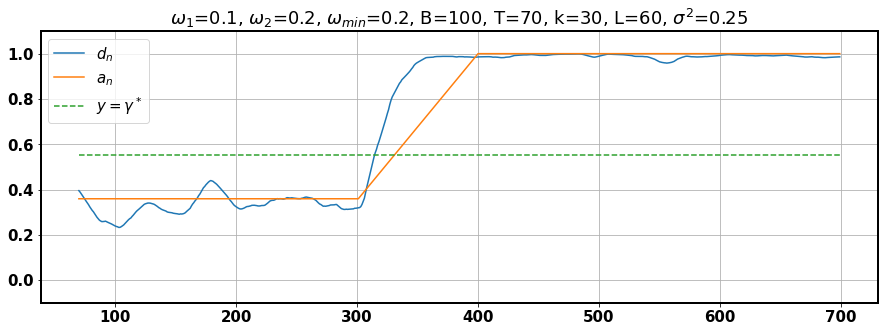

In [53]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=2)
X = np.arange(T, len(row)+T)
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(T, N), [g_analytical.thresh]*len(row), '--', label=r'$y=\gamma^*$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, k={k}, L={L}, $\sigma^2$={noise_sd**2}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter_t=70
plt.savefig("../presentation/imgs/system_estimation_one_iter_t=70.png")

In [353]:
print(f"Q_hat using analytical thresh: {Q_hat_correct+T}, found using {Q_hat_correct+T-Q} points, k = {k}")

Q_hat using analytical thresh: 321, found using 20 points, k = 30


## $\sigma^2 = 0.0625$

In [174]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5
T = 70
noise_sd=0.25

In [175]:
def modelling_series(t):
    if t is None:
        t = T_
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=t, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [176]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series(T)

100%|██████████| 200/200 [03:50<00:00,  1.15s/it]

Modelling took 230.2648 s


In [177]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
fnr = []  # Детекции позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    fn = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            fn += 1
            continue
        Q_hat += T
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
        if Q_hat > Q+k:
            fn += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))
    fnr.append(round(fn/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = noise_sd**2/(0.5 + noise_sd**2)
    g_analytical = ThreshAnalytical(w1, w_min, L, T, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)


print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.235 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_4748\597431904.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


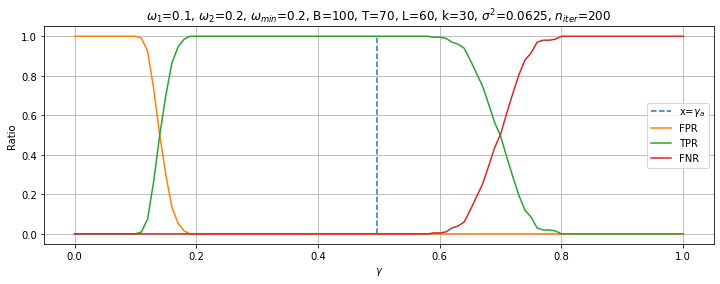

FPR corresponding to analytical thresh: 0.0


In [178]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
plt.plot(threshes, fnr, label='FNR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$n_{iter}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, L={L}, k={k}, $\sigma^2$={noise_sd**2}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation_t=70_small_sd

In [179]:
mean_thresh

0.49758454106280176

In [180]:
fpr[49]

0.0

In [181]:
tpr[49]

1.0

In [182]:
fnr[49]

0.0

In [183]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

approx_correct = [initial_value for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

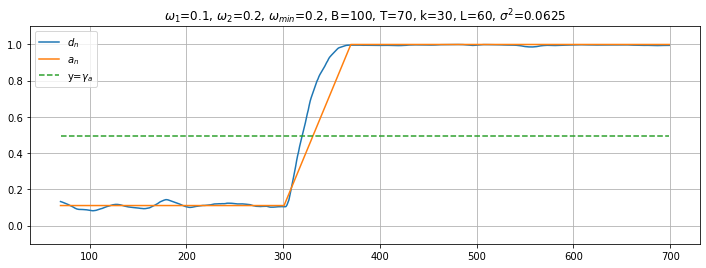

In [184]:
X = np.arange(T, len(row)+T)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(T, N), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, k={k}, L={L}, $\sigma^2$={noise_sd**2}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter_t=70_small_sd

In [353]:
print(f"Q_hat using analytical thresh: {Q_hat_correct+T}, found using {Q_hat_correct+T-Q} points, k = {k}")

Q_hat using analytical thresh: 321, found using 20 points, k = 30


## T=130

In [54]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5
T = 130
noise_sd=0.5

In [55]:
def modelling_series(t):
    if t is None:
        t = T_
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=t, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [56]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series(T)

C:\Users\ivank\AppData\Local\Temp\ipykernel_21668\143398379.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(iter_num)):


  0%|          | 0/200 [00:00<?, ?it/s]

Modelling took 244.5111 s


In [57]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
fnr = []  # Детекции позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    fn = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            fn += 1
            continue
        Q_hat += T
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
        if Q_hat > Q+k:
            fn += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))
    fnr.append(round(fn/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = np.quantile(row[:Q-T], 0.75)
    g_analytical = ThreshAnalytical(w1, w_min, L, T, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)


print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.174 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_21668\3171652651.py:9: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


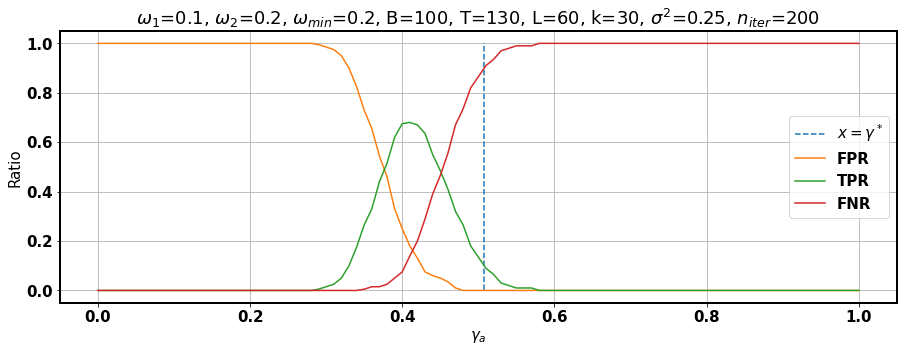

In [59]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=2)

plt.figure(figsize=(15, 5))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'$x=\gamma^*$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
plt.plot(threshes, fnr, label='FNR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$n_{iter}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, L={L}, k={k}, $\sigma^2$={noise_sd**2}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma_a$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.savefig("../presentation/imgs/system_estimation_t=130.png")
# system_estimation_t=130

In [170]:
mean_thresh

0.48837209302325574

In [171]:
fpr[48]

0.0

In [172]:
tpr[48]

0.265

In [173]:
fnr[48]

0.735

In [60]:
row = modelled_rows[0]
initial_value = np.quantile(row[:Q-T], 0.75)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)
approx_correct = [initial_value for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

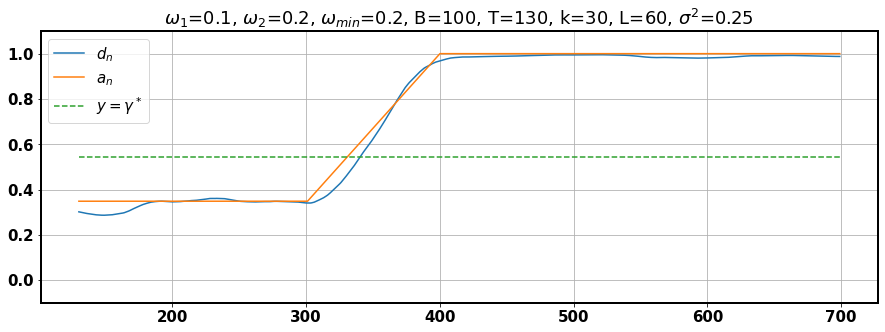

In [61]:
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=2)

X = np.arange(T, len(row)+T)
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(T, len(row)+T), [g_analytical.thresh]*len(row), '--', label=r'$y=\gamma^*$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, k={k}, L={L}, $\sigma^2$={noise_sd**2}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
plt.savefig("../presentation/imgs/system_estimation_one_iter_t=130.png")
# system_estimation_one_iter_t=130

In [361]:
print(f"Q_hat using analytical thresh: {Q_hat_correct+T}, found using {Q_hat_correct+T-Q} points, k = {k}")

Q_hat using analytical thresh: 336, found using 35 points, k = 30


### Маленькие T

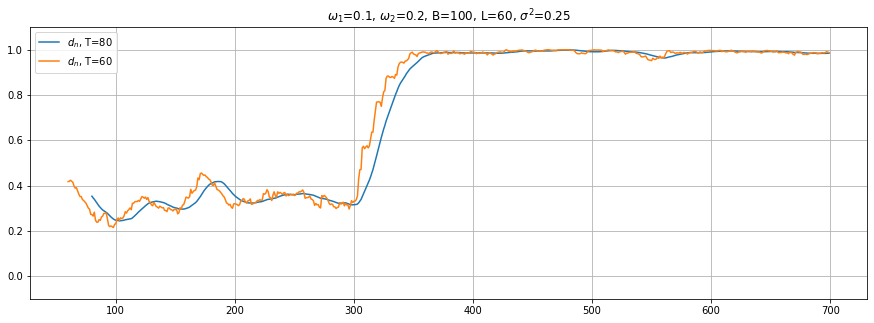

In [114]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
L = 60
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row1 = Hmatr(f=original_series, B=B, T=80, L=L, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=60, L=L, neig=r, svdMethod=method).getRow()


w_min_str = r'$\omega_{min}$'

plt.figure(figsize=(15, 5))
plt.plot(np.arange(80, len(row1)+80), row1, label=r'$d_n$, T=80')
plt.plot(np.arange(60, len(row2)+60), row2, label=r'$d_n$, T=60')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, L={L}, $\sigma^2$={noise_sd**2}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# decreasing_T

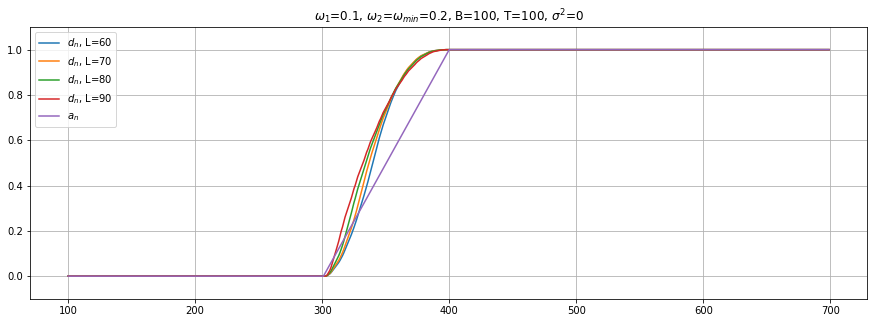

In [191]:
np.random.seed(12345)
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60
eps_v = 0.25
# original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=60, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=T_, L=70, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=B, T=T_, L=80, neig=r, svdMethod=method).getRow()
row4 = Hmatr(f=original_series, B=B, T=T_, L=90, neig=r, svdMethod=method).getRow()


# initial_value = noise_sd**2/(0.5 + noise_sd**2)
initial_value = 0
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)

approx_correct = [initial_value for i in range(Q-T_)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row1) - len(approx_correct))]]

w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
X = np.arange(T_, len(row1)+T_)
plt.plot(X, row1, label=r'$d_n$, L=60')
plt.plot(X, row2, label=r'$d_n$, L=70')
plt.plot(X, row3, label=r'$d_n$, L=80')
plt.plot(X, row4, label=r'$d_n$, L=90')
plt.plot(X, approx_correct, label=r'$a_n$')

# plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, B={B}, T={T_}, $\sigma^2$={noise_sd**2}")
# plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, T={T_}, $\sigma^2$={noise_sd**2}")
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, B={B}, T={T_}, $\sigma^2$={0}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_diff_L.png

## Оценка влияния параметра B

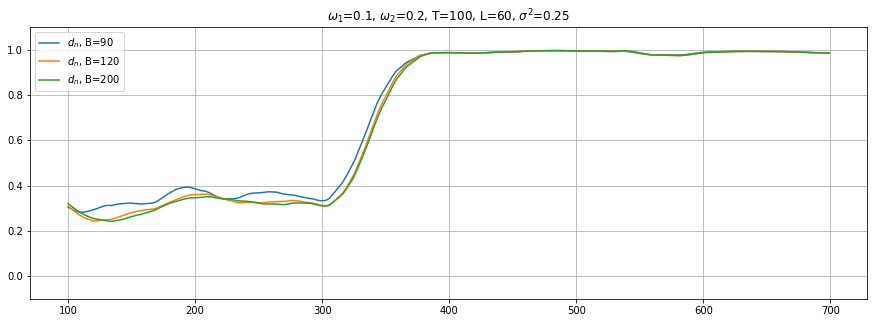

In [117]:
np.random.seed(12345)
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
# original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=120, T=T_, L=L, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()

w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
X = np.arange(B, len(row1)+B)
plt.plot(X, row1, label=r'$d_n$, B=90')
plt.plot(X, row2, label=r'$d_n$, B=120')
plt.plot(X, row3, label=r'$d_n$, B=200')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, T={T_}, L={L}, $\sigma^2$={noise_sd**2}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_diff_B.png

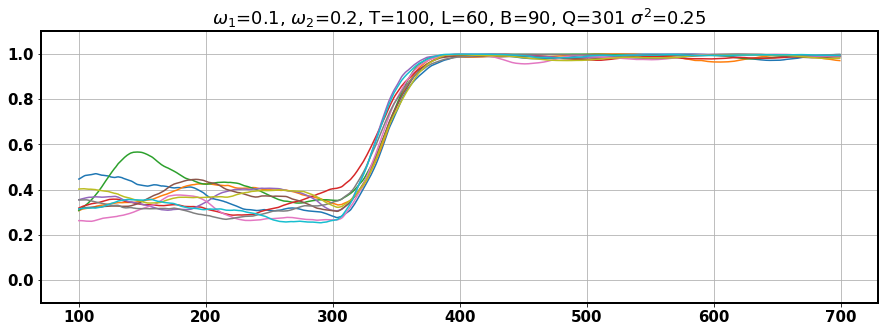

In [68]:
# np.random.seed(12345)
from matplotlib import rc, rcParams
rc('font', weight='bold', size=15)
rc('axes', linewidth=2)
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
# original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row2 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row3 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row4 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row5 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row6 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row7 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row8 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row9 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row10 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()

w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
X = np.arange(B, len(row1)+B)
plt.plot(X, row1, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row2, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row3, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row4, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row5, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row6, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row7, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row8, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row9, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row10, label=r'$d_{n-1}^{(1)}$')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, T={T_}, L={L}, B={90}, Q={Q} $\sigma^2$={noise_sd**2}")
# plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.savefig("../presentation/imgs/row_diff_small_B.png")
# row_diff_small_B.png

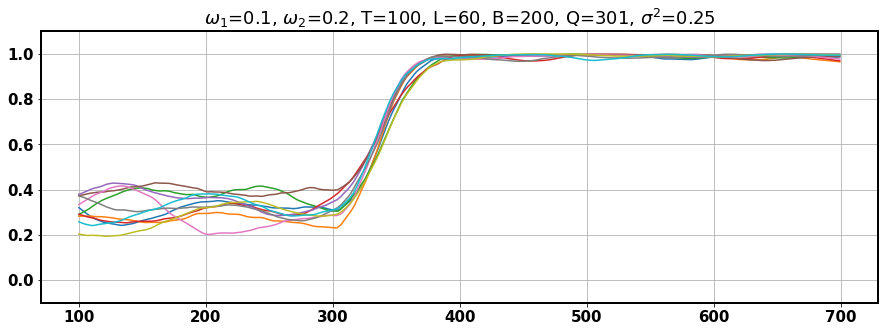

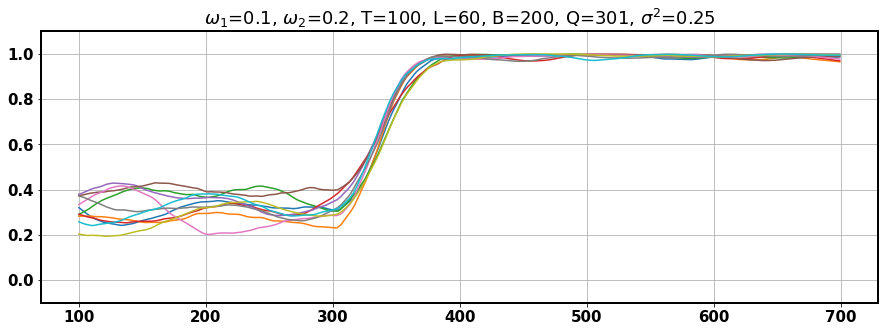

In [73]:
np.random.seed(12345)
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
# original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row2 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row3 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row4 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row5 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row6 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row7 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row8 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row9 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_sd, size=N)
row10 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()

w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
X = np.arange(B, len(row1)+B)
plt.plot(X, row1, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row2, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row3, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row4, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row5, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row6, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row7, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row8, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row9, label=r'$d_{n-1}^{(1)}$')
plt.plot(X, row10, label=r'$d_{n-1}^{(1)}$')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, T={T_}, L={L}, B={200}, Q={Q}, $\sigma^2$={noise_sd**2}")
# plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.savefig("../presentation/imgs/row_diff_big_B.png")
# row_diff_big_B.png